In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question

Are racial concentration and average yelp ratings for a certain cuisine correlated?


### Hypothesis

Racial demographic and average yelp ratings should have a positive correlation.
We hypothesize this because we think that if a states has a high concentration
of certain race, that the average quality of the resaurants operating in that state 
whic serving the certain ethnic cuisine should be relatively high. For example,
in New York, where there is a thriving Little Italy community, we would expect
a high average yelp rating for Italian restaurants because of the high concentration
of New Yorkans of Italian descent.


We will be using the Yelp Businesses dataset to obtain average rating information, 
which is publicly available at https://www.yelp.com/dataset.

In [56]:
df = pd.read_json('/Users/hiro002/Documents/git/yelp project/yelp_dataset/yelp_academic_dataset_business.json', lines = True)

### Data Cleaning/Wrangling

We perform some feature engineering to create useful columns like 'cuisine_type'.
We also drop some columns that are not of use for us.
Here, we also take measures to prevent data skewing, like dropping rows with 
only a few entries.

In [57]:
df = df.drop(columns = ['latitude',	'longitude', 'hours', 'attributes', 'address', 'business_id'])
df = df.dropna(subset = ['categories'])
df = df.loc[df['categories'].str.contains('Restaurants')]
df = df.set_index('name')

In [58]:
"""
We make a list of all unique categories entries.
"""

all_categories = list(df['categories'].values)

unique_categories = []
for categories in all_categories:
    for category in categories.split(', '):
        if category not in unique_categories:
            unique_categories.append(category)

In [59]:
"""
Unique regional cuisines will be stored in a new list. For example, the
`asian` list will contain categories like 'Japanese', 'Chinese', 'Filipino'.
We will only include broad ethnicities in this analysis because we beleive we 
do not have sufficient data to perform ethno-specific analysis. The 
US/Canadian census does not collect ethno-specific racial demographic data. 
Notably, the only demographic data available through the census is whether a 
person is 'White', 'Black/African American', 'Asian', 'Hispanic/Latino'.

These three lists were created by hand by inspecting the `unique_categories`
list.
"""

asian = [
    'Chinese', 'Taiwanese', 'Korean', 'Japanese', 'Thai', 'Vietnamese', 
    'Filipino', 'Malaysian', 'Cantonese', 'Cambodian', 
    'Singaporean', 'Szechuan', 'Indonesian', 'Laotian', 'Mongolian',
    'Shanghainese', 'Hakka', 'Sri Lankan', 'Oriental'
]

latinhispanic = [
    'Brazilian', 'Mexican', 'Tex-mex', 'Caribbean', 'Puerto Rican', 'Cuban', 
    'Latin American', 'Colombian', 'Venezuelan', 'Dominican', 'Haitian',
    'Honduran', 'Trinidadian', 'Nicaraguan'
]

african = [
    'African', 'Southern', 'Soul Food', 'Ethiopian', 'Somali', 
    'South African', 'Eritrean'
]

In [60]:
"""
We create 'asian', 'latin', and 'african' columns indicating the cuisine of 
the row using regex
"""
df['asian'] = df['categories'].str.contains('|'.join(asian))
df['latin'] = df['categories'].str.contains('|'.join(latinhispanic))
df['african'] = df['categories'].str.contains('|'.join(african))

In [61]:
"""
Dropping a row with a state with only one entry.
"""

df.loc[df.get('state') == 'ABE']
df = df.drop(['Kitanoya Guu Garlic'])
df

,city,state,postal_code,stars,review_count,is_open,categories,asian,latin,african
name,,,,,,,,,,
Oskar Blues Taproom,Boulder,CO,80302,4.0,86,1,"Gastropubs, Food, Beer Gardens, Restaurants, B...",False,False,False
Flying Elephants at PDX,Portland,OR,97218,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",False,False,False
Bob Likes Thai Food,Vancouver,BC,V5V,3.5,169,1,"Restaurants, Thai",True,False,False
Boxwood Biscuit,Columbus,OH,43206,4.5,11,1,"Breakfast & Brunch, Restaurants",False,False,False
Mr G's Pizza & Subs,Peabody,MA,01960,4.0,39,1,"Food, Pizza, Restaurants",False,False,False
...,...,...,...,...,...,...,...,...,...,...
Split Dine and Drink,Tigard,OR,97224,2.0,48,0,"American (Traditional), Desserts, American (Ne...",False,False,False
Maudie’s Hill Country,Bee Cave,TX,78738,3.0,310,1,"Mexican, Bars, Nightlife, Tex-Mex, Restaurants",False,True,False
Mama's Cocina Latina,Atlanta,GA,30324,3.0,185,1,"Restaurants, Mexican, Latin American",False,True,False


In [62]:
"""
We will remove restaurants with less than 20 reviews to prevent skewing of data.
"""

df = df.loc[df.get('review_count') >= 20]
df

,city,state,postal_code,stars,review_count,is_open,categories,asian,latin,african
name,,,,,,,,,,
Oskar Blues Taproom,Boulder,CO,80302,4.0,86,1,"Gastropubs, Food, Beer Gardens, Restaurants, B...",False,False,False
Flying Elephants at PDX,Portland,OR,97218,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",False,False,False
Bob Likes Thai Food,Vancouver,BC,V5V,3.5,169,1,"Restaurants, Thai",True,False,False
Mr G's Pizza & Subs,Peabody,MA,01960,4.0,39,1,"Food, Pizza, Restaurants",False,False,False
Sister Honey's,Orlando,FL,32806,4.5,135,1,"Restaurants, American (New), Bakeries, Dessert...",False,False,False
...,...,...,...,...,...,...,...,...,...,...
Saigon Noodle & Grill,Orlando,FL,32803,4.5,437,1,"Restaurants, Noodles, Salad, Vietnamese, Veget...",True,False,False
Split Dine and Drink,Tigard,OR,97224,2.0,48,0,"American (Traditional), Desserts, American (Ne...",False,False,False
Maudie’s Hill Country,Bee Cave,TX,78738,3.0,310,1,"Mexican, Bars, Nightlife, Tex-Mex, Restaurants",False,True,False


In [63]:
"""
We make a df with rows that are True in at least one of the cuisines. This
creates a df with only 'asian', 'latin', or 'african' cuisines. 
"""
df = df.loc[(df.get('asian') == True) | (df.get('latin') == True) | (df.get('african') == True)]

In [64]:
"""
We will consider our options for restaurants that are in two or more 
cuisine categories. 
"""
asian_bool = [int(boolean) for boolean in list(df.get('asian'))]
latin_bool = [int(boolean) for boolean in list(df.get('latin'))]
african_bool = [int(boolean) for boolean in list(df.get('african'))]

In [65]:
total_bool = [x + y + z for x, y, z in zip(asian_bool, latin_bool, african_bool)]
df['cuisine_count'] = total_bool

/var/folders/0q/rnxvhzqj7r126nv0n3nqs54r0000gn/T/ipykernel_85877/3573666480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cuisine_count'] = total_bool


In [66]:
"""
We will deal with restaurants with <= 2 cuisine_count later.
"""

df

,city,state,postal_code,stars,review_count,is_open,categories,asian,latin,african,cuisine_count
name,,,,,,,,,,,
Bob Likes Thai Food,Vancouver,BC,V5V,3.5,169,1,"Restaurants, Thai",True,False,False,1
Taco Bell,Boulder,CO,80301,1.5,44,1,"Restaurants, Tex-Mex, Tacos, Fast Food, Breakf...",False,True,False,1
Panda Express,Sanford,FL,32771,2.5,47,1,"Restaurants, Chinese, Fast Food",True,False,False,1
Olmecas Mexican Restaurant,Austin,TX,78741,3.0,21,0,"Coffee & Tea, Tex-Mex, Restaurants, Mexican, Food",False,True,False,1
Los Potrillos Mexican Restaurant & Bar,Vancouver,WA,98685,3.5,63,1,"Restaurants, Food Delivery Services, Mexican, ...",False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
Senor Tequilas,Columbus,OH,43235,3.0,81,0,"Bars, Nightlife, Event Planning & Services, Re...",False,True,False,1
O Ya,Boston,MA,02111,4.5,737,1,"Japanese, Sushi Bars, Restaurants",True,False,False,1
Saigon Noodle & Grill,Orlando,FL,32803,4.5,437,1,"Restaurants, Noodles, Salad, Vietnamese, Veget...",True,False,False,1


### EDA

We am still in the process of cleaning the data, but we perform some EDA to get
a feel for the dataset we are working with.

Notably, we make bar charts and a stacked bar plot visualizes the distrbution of different cuisines
amongst the differnt states.

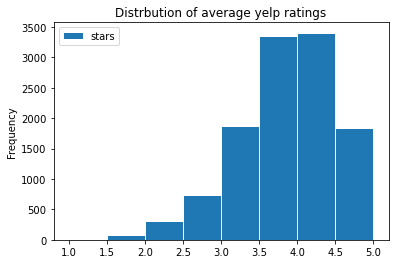

In [67]:
"""
Distribution of ratings amongst restaurants that serve asian, latin, or 
african food.
"""

df.plot(kind = 'hist', y = 'stars', ec = 'w', bins = 8, title = 'Distrbution of average yelp ratings');

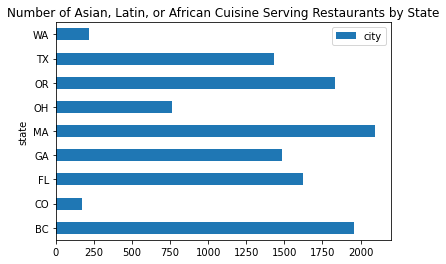

In [68]:
"""
Bar chart for the number of restaurants serving asian, latin, or african food 
by state.
"""

df.groupby('state').count().plot(kind = 'barh', y = 'city', title = 'Number of Asian, Latin, or African Cuisine Serving Restaurants by State');

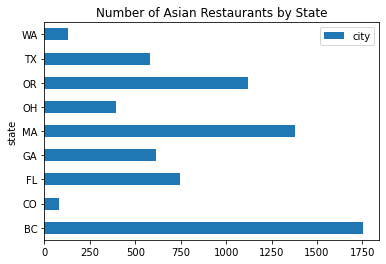

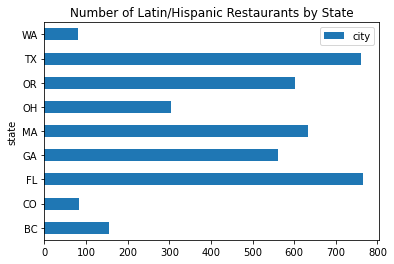

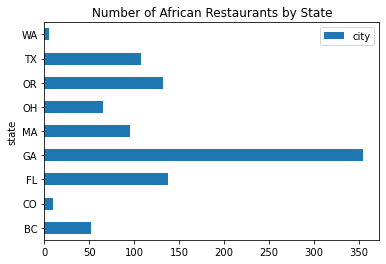

In [69]:
df.loc[df.get('asian') == True].groupby('state').count().plot(kind = 'barh', y = 'city', title = 'Number of Asian Restaurants by State');
df.loc[df.get('latin') == True].groupby('state').count().plot(kind = 'barh', y = 'city', title = 'Number of Latin/Hispanic Restaurants by State');
df.loc[df.get('african') == True].groupby('state').count().plot(kind = 'barh', y = 'city', title = 'Number of African Restaurants by State');

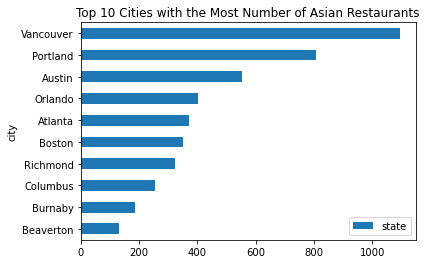

In [70]:
df.loc[df.get('asian') == True].groupby('city').count().sort_values(by = 'state')[-10:]\
    .plot(kind = 'barh', y = 'state', title = 'Top 10 Cities with the Most Number of Asian Restaurants');

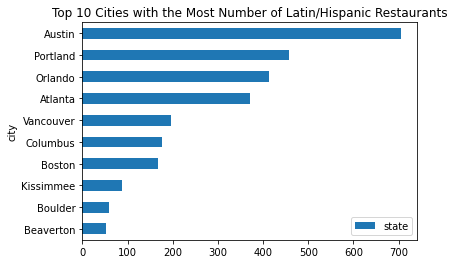

In [71]:
df.loc[df.get('latin') == True].groupby('city').count().sort_values(by = 'state')[-10:]\
    .plot(kind = 'barh', y = 'state', title = 'Top 10 Cities with the Most Number of Latin/Hispanic Restaurants');

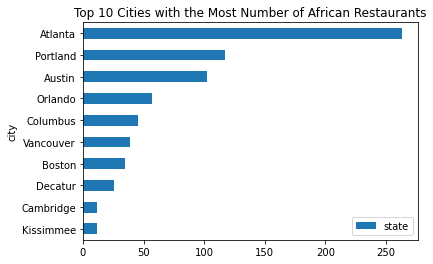

In [72]:
df.loc[df.get('african') == True].groupby('city').count().sort_values(by = 'state')[-10:]\
    .plot(kind = 'barh', y = 'state', title = 'Top 10 Cities with the Most Number of African Restaurants');

In [73]:
"""
We will remove restaurants with more than one category for simplicity.
The overall nature of the dataset should not change, because such restaurants 
represent a meager 1.13% of all restaurants in the dataset.
"""
print('Restaurants with more than 2 cuisine categories represent {:.2%} of the data'.format(df.loc[df.get('cuisine_count') >= 2].shape[0] / df.shape[0]))


Restaurants with more than 2 cuisine categories represent 1.13% of the data


In [74]:
df_only_one = df.loc[df.get('cuisine_count') == 1]
df_only_one

,city,state,postal_code,stars,review_count,is_open,categories,asian,latin,african,cuisine_count
name,,,,,,,,,,,
Bob Likes Thai Food,Vancouver,BC,V5V,3.5,169,1,"Restaurants, Thai",True,False,False,1
Taco Bell,Boulder,CO,80301,1.5,44,1,"Restaurants, Tex-Mex, Tacos, Fast Food, Breakf...",False,True,False,1
Panda Express,Sanford,FL,32771,2.5,47,1,"Restaurants, Chinese, Fast Food",True,False,False,1
Olmecas Mexican Restaurant,Austin,TX,78741,3.0,21,0,"Coffee & Tea, Tex-Mex, Restaurants, Mexican, Food",False,True,False,1
Los Potrillos Mexican Restaurant & Bar,Vancouver,WA,98685,3.5,63,1,"Restaurants, Food Delivery Services, Mexican, ...",False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
Senor Tequilas,Columbus,OH,43235,3.0,81,0,"Bars, Nightlife, Event Planning & Services, Re...",False,True,False,1
O Ya,Boston,MA,02111,4.5,737,1,"Japanese, Sushi Bars, Restaurants",True,False,False,1
Saigon Noodle & Grill,Orlando,FL,32803,4.5,437,1,"Restaurants, Noodles, Salad, Vietnamese, Veget...",True,False,False,1


In [75]:
"""
We will create a bar plot showing ratio of asian, latin, and african 
restaurants for each state/city.

We will make a column 'cuisine_type' that has either 'asian' 'african' or 'latin' 
to simplify graphing.
"""

asian_bool = [int(boolean) for boolean in list(df_only_one.get('asian'))]
latin_bool = [int(boolean) for boolean in list(df_only_one.get('latin'))]
african_bool = [int(boolean) for boolean in list(df_only_one.get('african'))]

def get_cuisine(asian, latin, african):
    if asian == True:
        return 'asian'
    elif latin == True:
        return 'latin'
    elif african == True:
        return 'african'

cuisine = [get_cuisine(x, y, z) for x, y, z in zip(asian_bool, latin_bool, african_bool)]


In [76]:
df_only_one['cuisine_type'] = cuisine


/var/folders/0q/rnxvhzqj7r126nv0n3nqs54r0000gn/T/ipykernel_85877/3542734283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_one['cuisine_type'] = cuisine


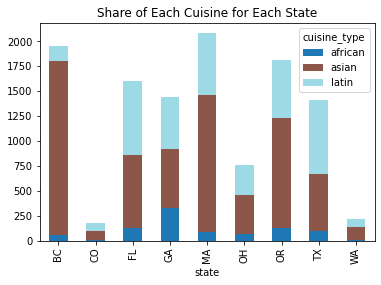

In [77]:
df_only_one.groupby(['state', 'cuisine_type']).size().unstack().plot(kind='bar', stacked=True, colormap = 'tab20', title = 'Share of Each Cuisine for Each State');

In [78]:
"""
The average star rating for each cuisine.
"""

df_only_one.groupby('cuisine_type').mean().get(['stars'])

,stars
cuisine_type,
african,3.766629
asian,3.604473
latin,3.597991


In [79]:
"""
We'll remove rows that are from states with less than 10 restaurants in a 
category. This is to prevent our findings from being thrown off by skewed data.
"""

df_only_one.groupby(['state', 'cuisine_type']).count()

city  postal_code  stars  review_count  is_open  \
state cuisine_type                                                    
BC    african         52           52     52            52       52   
      asian         1750         1750   1750          1750     1750   
      latin          150          150    150           150      150   
CO    african          9            9      9             9        9   
      asian           82           82     82            82       82   
      latin           82           82     82            82       82   
FL    african        127          127    127           127      127   
      asian          732          732    732           732      732   
      latin          740          740    740           740      740   
GA    african        324          324    324           324      324   
      asian          594          594    594           594      594   
      latin          528          528    528           528      528   
MA    african         88           88     88            88       88   
      asian         1372         1372   1372          1372     1372   
      latin          620          620    620           620      620   
OH    african         63           63     63            63       63   
      asian          391          391    391           391      391   
      latin          303          303    303           303      303   
OR    african        124          124    124           124      124   
      asian         1105         1105   1105          1105     1105   
      latin          583          583    583           583      583   
TX    african         96           96     96            96       96   
      asian          575          575    575           575      575   
      latin          745          745    745           745      745   
WA    african          4            4      4             4        4   
      asian          128          128    128           128      128   
      latin           81           81     81            81       81   

                    categories  asian  latin  african  cuisine_count  
state cuisine_type                                                    
BC    african               52     52     52       52             52  
      asian               1750   1750   1750     1750           1750  
      latin                150    150    150      150            150  
CO    african                9      9      9        9              9  
      asian                 82     82     82       82             82  
      latin                 82     82     82       82             82  
FL    african              127    127    127      127            127  
      asian                732    732    732      732            732  
      latin                740    740    740      740            740  
GA    african              324    324    324      324            324  
      asian                594    594    594      594            594  
      latin                528    528    528      528            528  
MA    african               88     88     88       88             88  
      asian               1372   1372   1372     1372           1372  
      latin                620    620    620      620            620  
OH    african               63     63     63       63             63  
      asian                391    391    391      391            391  
      latin                303    303    303      303            303  
OR    african              124    124    124      124            124  
      asian               1105   1105   1105     1105           1105  
      latin                583    583    583      583            583  
TX    african               96     96     96       96             96  
      asian                575    575    575      575            575  
      latin                745    745    745      745            745  
WA    african                4      4      4        4              4  
      asian                128    128    12

In [80]:
"""
Now we know that we should probably remove `WA african` restaurants and 
`CO african` restaurants from analysis because they might skew the results 
(due to small sample size).
"""

not_wa_african = [False if (state == 'WA' and cuisine == 'african') else True for state, cuisine in zip(list(df_only_one.get('state')), list(df_only_one.get('cuisine_type')))]
df_only_one = df_only_one.loc[not_wa_african]

not_co_african = [False if (state == 'CO' and cuisine == 'african') else True for state, cuisine in zip(list(df_only_one.get('state')), list(df_only_one.get('cuisine_type')))]
df_only_one = df_only_one.loc[not_co_african]

In [81]:
"""
Finally, we can prep the restaurant dataset so it can be easily merged with
census data. We will create a df for the average rating for each cuisine by 
state.
"""

df_only_one.groupby(['state', 'cuisine_type']).mean().get(['stars'])

stars
state cuisine_type          
BC    african       3.730769
      asian         3.484286
      latin         3.523333
CO    asian         3.573171
      latin         3.628049
FL    african       3.799213
      asian         3.659836
      latin         3.695270
GA    african       3.679012
      asian         3.579966
      latin         3.445076
MA    african       3.698864
      asian         3.529155
      latin         3.541935
OH    african       3.801587
      asian         3.632992
      latin         3.443894
OR    african       3.975806
      asian         3.793665
      latin         3.704974
TX    african       3.828125
      asian         3.711304
      latin         3.687919
WA    asian         3.671875
      latin         3.222222

In [82]:
"""
Average ratings for asian cuisine restaurants.
"""

asian_average = df_only_one.groupby(['state', 'cuisine_type']).mean().get(['stars']).reset_index()
asian_average = asian_average.loc[asian_average.get('cuisine_type') == 'asian'].sort_values(by = 'stars', ascending = False).set_index('state')
asian_average

,cuisine_type,stars
state,,
OR,asian,3.793665
TX,asian,3.711304
WA,asian,3.671875
FL,asian,3.659836
OH,asian,3.632992
GA,asian,3.579966
CO,asian,3.573171
MA,asian,3.529155
BC,asian,3.484286


In [83]:
"""
Average ratings for latin cuisine restaurants.
"""
latin_average = df_only_one.groupby(['state', 'cuisine_type']).mean().get(['stars']).reset_index()
latin_average = latin_average.loc[latin_average.get('cuisine_type') == 'latin'].sort_values(by = 'stars', ascending = False).set_index('state')
latin_average

,cuisine_type,stars
state,,
OR,latin,3.704974
FL,latin,3.695270
TX,latin,3.687919
CO,latin,3.628049
MA,latin,3.541935
BC,latin,3.523333
GA,latin,3.445076
OH,latin,3.443894
WA,latin,3.222222


In [84]:
"""
Average ratings for african cuisine restaurants.
"""
african_average = df_only_one.groupby(['state', 'cuisine_type']).mean().get(['stars']).reset_index()
african_average = african_average.loc[african_average.get('cuisine_type') == 'african'].sort_values(by = 'stars', ascending = False).set_index('state')
african_average

,cuisine_type,stars
state,,
OR,african,3.975806
TX,african,3.828125
OH,african,3.801587
FL,african,3.799213
BC,african,3.730769
MA,african,3.698864
GA,african,3.679012


**Data Wrangling for the Demographic Data**

We performed some quick data cleaning to get the dataframe into a shape that is
easy to merge with the cuisine dataframes. We do quick EDA and data visualization
as well here.

All the demographic information imported are from 
https://www.census.gov/data/datasets/ for the US data and 
https://www12.statcan.gc.ca/ for the Canadian data.


In [85]:
"""
These CSV files have already been somewhat modified to fit our needs.
"""

GA = pd.read_csv('/Users/hiro002/Documents/git/yelp project/racial demographics/GA_demographic.csv')
MA = pd.read_csv('/Users/hiro002/Documents/git/yelp project/racial demographics/MA_demographic.csv')
FL = pd.read_csv('/Users/hiro002/Documents/git/yelp project/racial demographics/FL_demographic.csv')
OH = pd.read_csv('/Users/hiro002/Documents/git/yelp project/racial demographics/FL_demographic.csv')
TX = pd.read_csv('/Users/hiro002/Documents/git/yelp project/racial demographics/TX_demographic.csv')
OR = pd.read_csv('/Users/hiro002/Documents/git/yelp project/racial demographics/OR_demographic.csv')
WA = pd.read_csv('/Users/hiro002/Documents/git/yelp project/racial demographics/WA_demographic.csv')

In [86]:
GA = GA.set_index('Sex, Race, and Hispanic Origin').get(['2019'])
MA = MA.set_index('Sex, Race, and Hispanic Origin').get(['2019'])
FL = FL.set_index('Sex, Race, and Hispanic Origin').get(['2019'])
OH = OH.set_index('Sex, Race, and Hispanic Origin').get(['2019'])
TX = TX.set_index('Sex, Race, and Hispanic Origin').get(['2019'])
OR = OR.set_index('Sex, Race, and Hispanic Origin').get(['2019'])
WA = WA.set_index('Sex, Race, and Hispanic Origin').get(['2019'])


In [87]:
"""
We will make a column which represents the percentage of that race in the 
state.
This function takes in a df object and returns a list which are the 
proportions of each race in the given state.
"""

def race_prop(df):
    total = int(df.get('2019')['TOTAL POPULATION'].replace(',', ''))
    pops = list(map(lambda x: int(x.replace(',', '')), list(df.get('2019'))))
    return [round(pop / total, 3) for pop in pops]


In [88]:
"""
Assigning the proportion column to each df using the function defined above.
"""

for state in [(GA, 'GA'), (MA, 'MA'), (FL, 'FL'), (OH, 'OH'), (TX, 'TX'), (OR, 'OR'), (WA, 'WA')]:
    state[0]['{}_proportions'.format(state[1])] = race_prop(state[0])
    state[0].drop(columns = ['2019'], inplace = True)


In [89]:
"""
We merge all the population proportions into a single df.
"""

for state in [MA, FL, OH, TX ,OR, WA]:
    GA = GA.merge(state, left_index=True, right_index=True)
GA

,GA_proportions,MA_proportions,FL_proportions,OH_proportions,TX_proportions,OR_proportions,WA_proportions
"Sex, Race, and Hispanic Origin",,,,,,,
TOTAL POPULATION,1.000,1.000,1.000,1.000,1.000,1.000,1.000
White,0.520,0.711,0.532,0.532,0.412,0.751,0.675
Black or African American,0.316,0.073,0.155,0.155,0.121,0.020,0.040
American Indian and Alaska Native,0.002,0.002,0.003,0.003,0.003,0.011,0.013
Asian,0.043,0.071,0.028,0.028,0.050,0.047,0.093
Native Hawaiian and Other Pacific Islander,0.001,0.000,0.001,0.001,0.001,0.004,0.007
Two or More Races,0.019,0.019,0.017,0.017,0.015,0.033,0.041
HISPANIC,0.099,0.124,0.264,0.264,0.397,0.134,0.130


In [90]:
"""
We rename rows to make them easier to work with.
"""

demographic = GA.loc[['Black or African American', 'Asian', 'HISPANIC']]
demographic = demographic.rename({'Black or African American': 'african', 'Asian': 'asian', 'HISPANIC': 'latin'})
demographic


,GA_proportions,MA_proportions,FL_proportions,OH_proportions,TX_proportions,OR_proportions,WA_proportions
"Sex, Race, and Hispanic Origin",,,,,,,
african,0.316,0.073,0.155,0.155,0.121,0.020,0.040
asian,0.043,0.071,0.028,0.028,0.050,0.047,0.093
latin,0.099,0.124,0.264,0.264,0.397,0.134,0.130


In [91]:
"""
We must get BC data now. We are doing this seperately from the US states 
because BC/Canda likely has a different data format than the rest of the US 
states that we just formatted.
"""

BC = pd.read_csv('/Users/hiro002/Documents/git/yelp project/racial demographics/BC_demographic.csv')
BC

,Characteristics,Total
0,Total,4560240
1,Caribbean origins,25010
2,Latin; Central and South American origins,69920
3,African origins,59985
4,Asian origins,1312445


In [92]:
"""
For the purpose of this project, we will consider people of Carribean 
and Latin orgin both as latin origin. Therefore, we will combine these two 
rows into one.
"""

latin = ['latin', BC.loc[1].get('Total') + BC.loc[2].get('Total')]
BC.loc[len(BC.index)] = latin
BC = BC.set_index('Characteristics')
BC = BC.rename({'  Asian origins': 'asian', '  African origins': 'african'})

In [93]:
"""
We will crate a proportions column using a similar method as before. We want
to make this dataframe as similar to the `demographic` df so that merging is
easy.
"""

total = BC.loc['Total'].get('Total')
pops = list(BC.get('Total'))
props = [round(pop / total, 3) for pop in pops]

BC['BC_proportions'] = props
BC = BC.loc[['asian', 'african', 'latin']].drop(columns = ['Total'])
BC

,BC_proportions
Characteristics,
asian,0.288
african,0.013
latin,0.021


In [94]:
"""
Merging `BC` df to `demographic` df.
"""

demographic = demographic.merge(BC, left_index=True, right_index=True)
demographic

,GA_proportions,MA_proportions,FL_proportions,OH_proportions,TX_proportions,OR_proportions,WA_proportions,BC_proportions
african,0.316,0.073,0.155,0.155,0.121,0.020,0.040,0.013
asian,0.043,0.071,0.028,0.028,0.050,0.047,0.093,0.288
latin,0.099,0.124,0.264,0.264,0.397,0.134,0.130,0.021


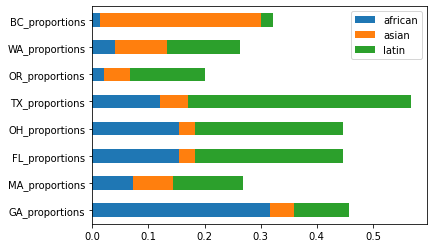

In [95]:
"""
Stack bar chart representing the proprotion of each ethnicity in each state.
"""

demographic.transpose().plot(kind = 'barh', stacked = True);

In [96]:
"""
We create three seperate dfs that contain the proportion for asians, latinos,
and africans for each state.
"""

asian_prop_ranked = demographic.loc[['asian']]
asian_prop_ranked = asian_prop_ranked.transpose().sort_values(by = 'asian', ascending = False)

latin_prop_ranked = demographic.loc[['latin']]
latin_prop_ranked = latin_prop_ranked.transpose().sort_values(by = 'latin', ascending = False)

african_prop_ranked = demographic.loc[['african']]
african_prop_ranked = african_prop_ranked.transpose().sort_values(by = 'african', ascending = False)

asian_prop_ranked

,asian
BC_proportions,0.288
WA_proportions,0.093
MA_proportions,0.071
TX_proportions,0.050
OR_proportions,0.047
GA_proportions,0.043
FL_proportions,0.028
OH_proportions,0.028


In [97]:
"""
Since we ultimately want to merge the demographic data to the 
`<cuisine>_average` df, we are going to rename the row names of the 
`<cuisine>_prop_ranked` df to their state names.
"""

remove = lambda x: x.split('_')[0]
asian_prop_ranked = asian_prop_ranked.rename(index = remove)
latin_prop_ranked = latin_prop_ranked.rename(index = remove)
african_prop_ranked = african_prop_ranked.rename(index = remove)

In [98]:
asian_prop_ranked = asian_prop_ranked.rename(columns = {'asian': 'asian_proportion'})
asian_prop_ranked

,asian_proportion
BC,0.288
WA,0.093
MA,0.071
TX,0.050
OR,0.047
GA,0.043
FL,0.028
OH,0.028


In [99]:
african_prop_ranked = african_prop_ranked.rename(columns = {'african': 'african_proportion'})
african_prop_ranked

,african_proportion
GA,0.316
FL,0.155
OH,0.155
TX,0.121
MA,0.073
WA,0.040
OR,0.020
BC,0.013


In [100]:
latin_prop_ranked = latin_prop_ranked.rename(columns = {'latin': 'latin_proportion'})
latin_prop_ranked

,latin_proportion
TX,0.397
FL,0.264
OH,0.264
OR,0.134
WA,0.130
MA,0.124
GA,0.099
BC,0.021


**We can finally answer our question: whether high concetrations of a certain race
and yelp ratings for that certain cuisine are correlated.**

We'll indivually plot them, and then plot them together. We'll calculate the 
correlation coefficient for each cuisine type just in case, but the information is likely
to be not that useful because there are too few data points.

In [101]:
african_corr = african_average.merge(african_prop_ranked, left_index=True, right_index=True)
african_corr

,cuisine_type,stars,african_proportion
OR,african,3.975806,0.020
TX,african,3.828125,0.121
OH,african,3.801587,0.155
FL,african,3.799213,0.155
BC,african,3.730769,0.013
MA,african,3.698864,0.073
GA,african,3.679012,0.316


correlation coefficient: -0.4636990996139794


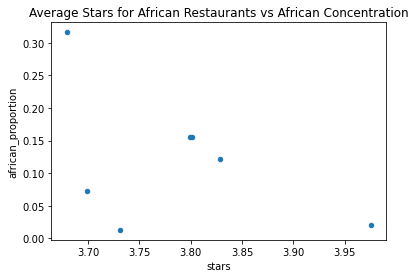

In [102]:
african_corr.plot(kind = 'scatter', x = 'stars', y = 'african_proportion', title = 'Average Stars for African Restaurants vs African Concentration');
print('correlation coefficient: {}'.format(np.corrcoef(list(african_corr.get('stars')), list(african_corr.get('african_proportion')))[0, 1]))

In [103]:
asian_corr = asian_average.merge(asian_prop_ranked, left_index=True, right_index=True)
asian_corr

,cuisine_type,stars,asian_proportion
OR,asian,3.793665,0.047
TX,asian,3.711304,0.050
WA,asian,3.671875,0.093
FL,asian,3.659836,0.028
OH,asian,3.632992,0.028
GA,asian,3.579966,0.043
MA,asian,3.529155,0.071
BC,asian,3.484286,0.288


correlation coefficient: -0.605136703629504


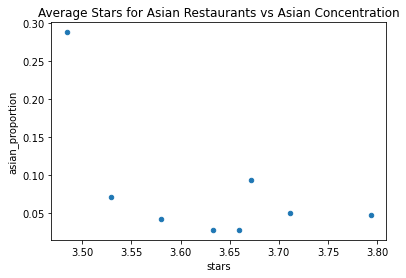

In [104]:
asian_corr.plot(kind = 'scatter', x = 'stars', y = 'asian_proportion', title = 'Average Stars for Asian Restaurants vs Asian Concentration');
print('correlation coefficient: {}'.format(np.corrcoef(list(asian_corr.get('stars')), list(asian_corr.get('asian_proportion')))[0, 1]))

In [105]:
latin_corr = latin_average.merge(latin_prop_ranked, left_index=True, right_index=True)
latin_corr

,cuisine_type,stars,latin_proportion
OR,latin,3.704974,0.134
FL,latin,3.695270,0.264
TX,latin,3.687919,0.397
MA,latin,3.541935,0.124
BC,latin,3.523333,0.021
GA,latin,3.445076,0.099
OH,latin,3.443894,0.264
WA,latin,3.222222,0.130


correlation coefficient: 0.3989826031784352


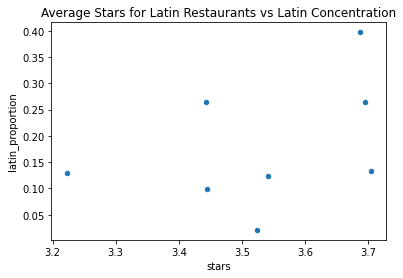

In [106]:
latin_corr.plot(kind = 'scatter', x = 'stars', y = 'latin_proportion', title = 'Average Stars for Latin Restaurants vs Latin Concentration')
print('correlation coefficient: {}'.format(np.corrcoef(list(latin_corr.get('stars')), list(latin_corr.get('latin_proportion')))[0, 1]))

Just looking at the average stars and racial concentrations of each race, it's not easy to see if
there is any kind of correlation between the two variables. Let's plot all three ethnicities in a scatterplot.

In [107]:
"""
We vertically append `asian_corr`, `latin_corr`, `african_corr` to make the
scatterplot.
"""

asian_corr = asian_corr.rename(columns = {'asian_proportion': 'prop'})
latin_corr = latin_corr.rename(columns = {'latin_proportion': 'prop'})
african_corr = african_corr.rename(columns = {'african_proportion': 'prop'})

correlation = asian_corr.append(african_corr).append(latin_corr)
correlation

,cuisine_type,stars,prop
OR,asian,3.793665,0.047
TX,asian,3.711304,0.050
WA,asian,3.671875,0.093
FL,asian,3.659836,0.028
OH,asian,3.632992,0.028
GA,asian,3.579966,0.043
MA,asian,3.529155,0.071
BC,asian,3.484286,0.288
OR,african,3.975806,0.020
TX,african,3.828125,0.121


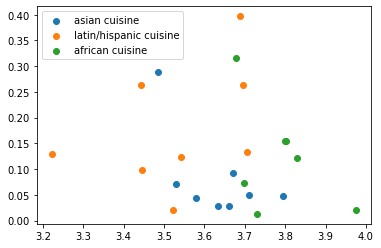

In [109]:
x_as = list(correlation.loc[correlation.get('cuisine_type') == 'asian'].get('stars'))
x_lt = list(correlation.loc[correlation.get('cuisine_type') == 'latin'].get('stars'))
x_af = list(correlation.loc[correlation.get('cuisine_type') == 'african'].get('stars'))

y_as = list(correlation.loc[correlation.get('cuisine_type') == 'asian'].get('prop'))
y_lt = list(correlation.loc[correlation.get('cuisine_type') == 'latin'].get('prop'))
y_af = list(correlation.loc[correlation.get('cuisine_type') == 'african'].get('prop'))


plt.scatter(x_as, y_as, label = 'asian cuisine')
plt.scatter(x_lt, y_lt, label = 'latin/hispanic cuisine')
plt.scatter(x_af, y_af, label = 'african cuisine')
plt.legend();

We will use np.corrcoef to calculate the correlation coefficient between 
average stars and racial concentration

In [55]:
x = list(correlation.get('stars'))
y = list(correlation.get('prop'))

print('Correlation Coefficient Between Ethnic Concentration and Average Yelp Ratings: {:.4}'.format(np.corrcoef(x, y)[0, 1]))

Correlation Coefficient Between Ethnic Concentration and Average Yelp Ratings: -0.1504


We got a correlation coefficient of -0.15. This is a very slight negative correlation.

**We will plot a line of best fit to visalize this coefficient.**

Line of Best Fit is: y = 0.4964 + -0.1012 * x


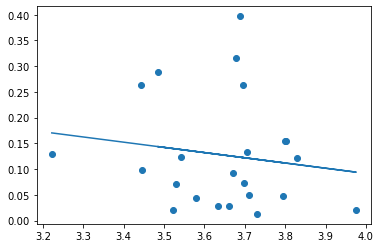

In [56]:
# some code borrowed from 'https://www.statology.org/line-of-best-fit-python/'

b, a = np.polyfit(x, y, 1)
plt.scatter(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit);

print('Line of Best Fit is: y = {:.4} + {:.4} * x'.format(a, b))

### Conclusion

According to our findings, racial demographic and restaurant ratings for a certain
ethnicity are slightly negatively correlated on the state level. That is, if a state 
has a high Asian population, like British Columbia, Asian restaurants in BC are likely
to have slightly lower average yelp ratings.

While correlation does not mean causation, we can speculate on reasons why this conclusion
may be true, or why we reached these conclusions.

Firstly, if there is a high concetration of a certain ethnicity in a given area, they
might be collectively rating restaurants that serve food from their culture harsher.
It is reasonable to think that Asian people would have high standards when it comes
to Asian food, for example.

Another possile explanation is that when there are high concetrations of a certain ethnicity,
there simply are a higher number of restaurants that serve food from that ethnic culture.
This might be lowering the barrier to entry for restaurnt businesses, allowing subpar
owners to open up restaurants, leading to less favorable reviews on average. This hypothesis is 
especially speculative.

From a data standpoint, we may have found these results because our data was not representative
of the population. While this yelp dataset is vast (around 11000 restaurants), there were notable
omissions in the dataset, like how it only included data about a handful of states, instead of
all 50 US states. This possibly-non representative dataset may have skewed our results,
casuing us to be mislead.